In [1]:
!pwd
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

/home/tomi/code/Harlequinht/which_horse/notebook


In [2]:
!ls
# !pip install tensorflow==2.10.0

 catboost_info
'Concat Data.ipynb'
 custom_loss_not_NN.py
 custom_loss.py
 custom_metric.py
 Deep_Learning_model-0803.ipynb
 Deep_Learning_model-0803_modifying.ipynb
 Deep_Learning_model-0803_modifying.ipynb:Zone.Identifier
 Deep_Learning_model.ipynb
 Feature_Engineering_Clean.ipynb
 get_weather_function.py
 Harlequinht
 HorseAgeAtRace.ipynb
 loss_function.py
 ML_flat.py
 ML_Regressor_Models_test.ipynb
 Modelling_testing.ipynb
 pipeline_cleaning.py
 pipeline_test.ipynb
 __pycache__
 WeatherAPI.ipynb
 WeatherData.py
 webapp.py
 which_horse_flat.ipynb
 which_horse_flat_modeling.ipynb
 which_horse.ipynb


In [3]:
!pip list | grep tensorflow

tensorflow                   2.10.0
tensorflow-estimator         2.10.0
tensorflow-io-gcs-filesystem 0.36.0


In [16]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import train_test_split
# !pip install tensorflow --upgrade

In [4]:
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.utils import get_custom_objects
from custom_loss import custom_loss_function
# import custom_metric

2024-03-12 17:23:44.389368: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 17:23:44.787283: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 17:23:44.861042: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-12 17:23:44.861061: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [5]:
from tensorflow.keras import Sequential, layers
from tensorflow.keras import metrics
from tensorflow.keras.layers import Normalization 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import datetime as dt
from tensorflow.keras import models

In [6]:
from tensorflow import keras
from tensorflow.keras import Model, Sequential, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
!ls

 catboost_info
'Concat Data.ipynb'
 custom_loss_not_NN.py
 custom_loss.py
 custom_metric.py
 Deep_Learning_model-0803.ipynb
 Deep_Learning_model-0803_modifying.ipynb
 Deep_Learning_model-0803_modifying.ipynb:Zone.Identifier
 Deep_Learning_model.ipynb
 Feature_Engineering_Clean.ipynb
 get_weather_function.py
 Harlequinht
 HorseAgeAtRace.ipynb
 loss_function.py
 ML_flat.py
 ML_Regressor_Models_test.ipynb
 Modelling_testing.ipynb
 pipeline_cleaning.py
 pipeline_test.ipynb
 __pycache__
 WeatherAPI.ipynb
 WeatherData.py
 webapp.py
 which_horse_flat.ipynb
 which_horse_flat_modeling.ipynb
 which_horse.ipynb


In [7]:
df = pd.read_csv('../raw_data/merge_dfs.csv')


In [8]:
df.columns

Index(['meeting_id', 'meeting_name', 'date', 'country_code', 'event_number',
       'distance', 'distance_unit', 'distance_furlongs',
       'distance_raw_furlongs', 'race_class',
       ...
       'Max Price', 'BSP', '15 Mins', '10 mins', '5 mins', '3 mins', '2 mins',
       '1 min ', 'Post Time', 'Last Traded Price'],
      dtype='object', length=137)

In [9]:
#testing pipeline
from pipeline_cleaning import clean_data
from pipeline_cleaning import transforming_data

In [10]:
df_clean= clean_data(df)

In [11]:
df_transform = transforming_data(df_clean)

In [15]:
pd.DataFrame(df_transform[0]).columns


Index(['barrier_1', 'barrier_2', 'barrier_3', 'barrier_4', 'barrier_5',
       'barrier_6', 'barrier_7', 'barrier_8', 'barrier_9', 'barrier_10',
       'barrier_11', 'barrier_12', 'barrier_13', 'barrier_14', 'barrier_15',
       'barrier_16', 'barrier_17', 'barrier_18', 'barrier_19', 'barrier_20',
       'track_condition_FAST', 'track_condition_FIRM', 'track_condition_GOOD',
       'track_condition_GOOD TO FIRM', 'track_condition_GOOD TO SOFT',
       'track_condition_HEAVY', 'track_condition_SOFT',
       'track_condition_STANDARD', 'track_condition_STANDARD TO FAST',
       'track_condition_STANDARD TO SLOW', 'race_type_NATIONAL_HUNT_FLAT',
       'track_type_TURF', 'race_class_normalised_Claiming',
       'race_class_normalised_Conditions', 'race_class_normalised_Grade 1',
       'race_class_normalised_Grade 2', 'race_class_normalised_Group 1',
       'race_class_normalised_Group 2', 'race_class_normalised_Group 3',
       'race_class_normalised_Handicap', 'race_class_normalised_Lis

In [16]:
train = df_transform[0]
val = df_transform[1]
test = df_transform[2]

In [18]:
X_train = train.drop(columns = ['win_or_lose', 'place','15_mins', '10_mins', '5_mins', '3_mins', '2_mins', '1_min_'], axis =1)
X_val = val.drop(columns = ['win_or_lose', 'place','15_mins', '10_mins', '5_mins', '3_mins', '2_mins', '1_min_'], axis =1)
X_test = test.drop(columns = ['win_or_lose', 'place','15_mins', '10_mins', '5_mins', '3_mins', '2_mins', '1_min_'], axis =1 )

In [22]:
y_train = train[['15_mins', '10_mins', '5_mins', '3_mins', '2_mins', '1_min_']]
y_val = val[['15_mins', '10_mins', '5_mins', '3_mins', '2_mins', '1_min_']]
y_test = test[['15_mins', '10_mins', '5_mins', '3_mins', '2_mins', '1_min_']]

In [23]:
y_test

,15_mins,10_mins,5_mins,3_mins,2_mins,1_min_
0,-0.309862,-0.310137,-0.313146,-0.316591,-0.31955,-0.319134
1,-0.266715,-0.273384,-0.273442,-0.248679,-0.235158,-0.267594
2,-0.245141,-0.230648,-0.240356,-0.256961,-0.239215,-0.227668
3,-0.336613,-0.338343,-0.34127,-0.338124,-0.340649,-0.347445
4,-0.333161,-0.33407,-0.331344,-0.331499,-0.332534,-0.336556
...,...,...,...,...,...,...
40345,-0.050979,-0.089619,-0.050108,-0.016784,0.105659,0.164329
40346,-0.050979,-0.05543,-0.050108,-0.08304,-0.105323,-0.133298
40347,-0.323669,-0.327232,-0.319764,-0.324873,-0.321173,-0.314779
40348,-0.275344,-0.286205,-0.277578,-0.290089,-0.267616,-0.274853


# training data

In [30]:
# X_train = df.loc[(df['date'] < '2023-01-01')]

In [31]:
# X_train

In [32]:
# y_train_tmp = df.loc[(df['date'] < '2023-01-01')]

In [33]:
# y_train = y_train_tmp[['win_or_lose']]

In [34]:
# test = np.expand_dims(y_train,(2,0))

In [35]:
# test.shape

In [36]:
# X_train = X_train.drop(['Unnamed: 0','win_or_lose', 'date', 'birth_date'], axis = 1)

In [37]:
# X_train.columns

In [38]:
# y_train

# testing data

In [39]:
# X_test = df.loc[(df['date'] > '2023-01-01') < = (df['date'] > '2023-01-01')]

In [40]:
# X_test

In [41]:
# y_test_tmp = df.loc[(df['date'] > '2023-01-01')]

In [42]:
# y_test = y_test_tmp['win_or_lose']

In [43]:
# X_test = X_test.drop(['win_or_lose', 'date', 'birth_date'], axis = 1)

In [44]:
# filtered_df

In [45]:
#X_train_split = len(X_train)*.2

In [46]:
# type(df['date'])

In [47]:
# df_filtered = filtered_df.drop(columns='Unnamed: 0')

In [48]:
# df_filtered.dtypes

In [49]:
# object_info = df.select_dtypes(include = 'object')

In [50]:
# object_info.head(5)

In [51]:
# #drop unnamed column as it's a replica of the index 
# df = df.drop(['date', 'birth_date'], axis = 1)

In [52]:
# df.select_dtypes(exclude = 'O')

In [53]:
# df = df.select_dtypes(exclude = ['object'])

In [54]:
# df.dtypes.unique()

In [55]:
# df.failed_to_finish_reason.dtype

In [56]:
# df.columns

In [57]:
# df = df.drop(['finish_position', 'Unnamed: 0', 'failed_to_finish_reason'], axis =1)

In [58]:
# df.columns

In [59]:
# X = df.copy().drop(columns='win_or_lose')

In [60]:
# X = X.drop(['date', 'birth_date','sire','dam'], axis = 1)

In [61]:
# X.columns

In [62]:
# X = X.drop(['Unnamed: 0'], axis = 1, inplace= True)

In [63]:
# X

In [64]:
# X.dtypes.unique()

In [65]:
# X_test = X.loc[(df['date'] > '2023-01-01')]

In [66]:
# X_train = X.loc[(df['date'] < '2023-01-01')]

In [67]:
# y_test = y.loc[(df['date'] > '2023-01-01')]

In [68]:
# y_train = y.loc[(df['date'] > '2023-01-01')]

In [69]:
# y_train.shape

In [70]:
# X.columns

In [71]:
# pd.DataFrame(X).describe()

In [72]:
# #remove novice races - remove horse races look at where race class normalized is handicapped
# X = X.drop(['date', 'birth_date', 'Unnamed: 0'], axis = 1)

In [73]:
# X.drop(['dam', 'sire'], axis = 1)

In [74]:
# X_train.select_dtypes(include='object')

In [75]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [76]:
# print(f"X_train.shape = {X_train.shape}")
# print(f"y_train.shape = {y_train.shape}")
# print(f"X_val.shape = {X_val.shape}")
# print(f"y_val.shape = {y_val.shape}")
# print(f"X_test.shape = {X_test.shape}")
# print(f"y_test.shape = {y_test.shape}")

# Model - Custom Loss Softmax

In [77]:
!pip freeze | grep tensorflow

tensorflow==2.10.0
tensorflow-estimator==2.10.0
tensorflow-io-gcs-filesystem==0.36.0


In [100]:
metrics = [
    keras.metrics.Recall(name='recall'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.AUC(name='prc', curve='PR'),
    keras.metrics.Accuracy(name='accuracy'),
    # keras.metrics.F1Score(name='f1_score')
    # keras.metrics.F1   # precision-recall curve add precsion, F1, accuracy
    
]
#change to mse, mae, rmse

In [97]:
es = EarlyStopping(patience=4)

In [98]:
# from loss_function import custom_loss_function
get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [102]:
#build model
def inititialize_model(X_train):

    #architecture
#   normaliser = Normalization() -suggestion to do normalization on target (y)
    model = models.Sequential()
    model.add(layers.Dense(1000, activation = 'relu', input_dim=X_train.shape[-1]))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(100, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(6, activation = 'linear'))
    
    # classification comilation
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss="mse",
              optimizer=optimizer, 
              metrics=metrics)
    return model_softmax

In [82]:
# def get_model(input_dim):

#     input_layer = keras.Input(shape=(input_dim,), name="input_layer")

#     dense_1 = keras.layers.Dense(input_dim, name = 'dense_1')(input_layer)
#     dense_2 = keras.layers.Dense(input_dim, name = 'dense_2')(dense_1)

#     regression_output = keras.layers.Dense(1, activation = 'linear', name = 'regression_output')(dense_2)
#     classification_output = keras.layers.Dense(1, activation = 'sigmoid', name = 'classification_output')(dense_2)
#     model = keras.Model(inputs=input_layer,outputs=[regression_output, classification_output])
    
#     return(model)

In [103]:
#initialize model
model_softmax = inititialize_model(X_train)
model_softmax.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              65000     
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 67,002
Trainable params: 67,002
Non-trainable params: 0
_________________________________________________________________


In [111]:
# Train the model
history = model_softmax.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=10, #increase number of epochs
                    batch_size=32, 
                    callbacks=[es])

Epoch 1/10
4052/4052 [==============================] - 12s 3ms/step - loss: -0.0420 - recall: 0.5984 - precision: 0.6646 - prc: 0.6844 - accuracy: 0.0171 - val_loss: -0.0459 - val_recall: 0.5782 - val_precision: 0.6451 - val_prc: 0.6593 - val_accuracy: 0.0182
Epoch 2/10
4052/4052 [==============================] - 13s 3ms/step - loss: -0.0421 - recall: 0.6021 - precision: 0.6687 - prc: 0.6863 - accuracy: 0.0189 - val_loss: -0.0460 - val_recall: 0.5778 - val_precision: 0.6446 - val_prc: 0.6554 - val_accuracy: 0.0195
Epoch 3/10
4052/4052 [==============================] - 12s 3ms/step - loss: -0.0424 - recall: 0.6057 - precision: 0.6728 - prc: 0.6879 - accuracy: 0.0206 - val_loss: -0.0459 - val_recall: 0.6008 - val_precision: 0.6702 - val_prc: 0.6831 - val_accuracy: 0.0215
Epoch 4/10
4052/4052 [==============================] - 12s 3ms/step - loss: -0.0424 - recall: 0.6023 - precision: 0.6689 - prc: 0.6811 - accuracy: 0.0222 - val_loss: -0.0458 - val_recall: 0.5883 - val_precision: 0.65

In [105]:
y_test_pred = model_softmax.predict(X_test, verbose=0)

In [106]:
y_test_pred

array([[9.9333161e-01, 6.6683656e-03],
       [9.9454147e-01, 5.4584797e-03],
       [2.7146756e-03, 9.9728531e-01],
       ...,
       [7.7363067e-09, 1.0000000e+00],
       [3.0641246e-03, 9.9693584e-01],
       [4.3962081e-32, 1.0000000e+00]], dtype=float32)

In [107]:
model_softmax.evaluate((X_test),y_test)

1044/1044 [==============================] - 2s 2ms/step - loss: -0.0418 - recall: 0.5611 - precision: 0.6251 - prc: 0.6450 - accuracy: 0.0139


[-0.04179447889328003,
 0.5610687136650085,
 0.6250636577606201,
 0.6449755430221558,
 0.01392424013465643]

In [108]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

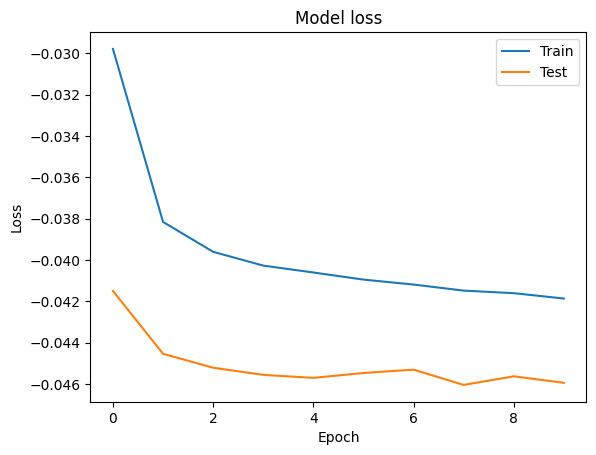

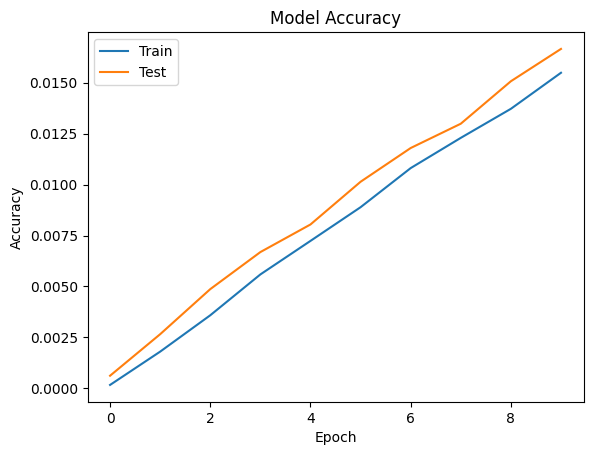

In [109]:
plot_loss_accuracy(history)

In [110]:
plot_history(history)

NameError: name 'plot_history' is not defined

<Axes: ylabel='Count'>

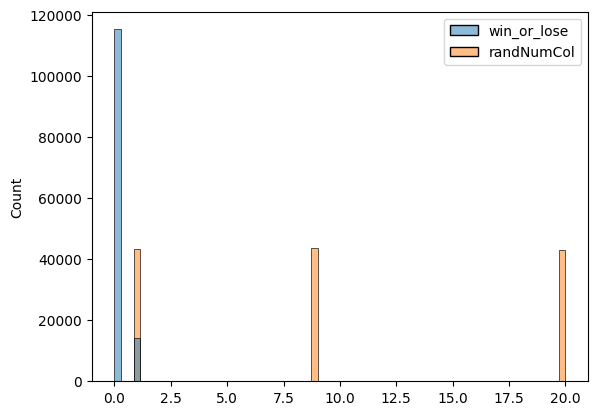

In [ ]:
sns.histplot(y_train)

In [ ]:
# history = model.fit(X_train, y_train,
#                     validation_data = (X_val, y_val),
#                     epochs=100,
#                     batch_size=64, # Large enough to get a decent chance of containing fraudulent transactions 
#                     callbacks=[es], shuffle=True)

In [ ]:
row_to_show = 24  # Select one instance to explain
feature_values = X_test.iloc[[row_to_show]]
prediction = model.predict(feature_values)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(f"{'The prediction for this instance:':<35}{prediction[0]:>7.3f}")

In [ ]:
feature_values

,barrier_1,barrier_2,barrier_3,barrier_4,barrier_5,barrier_6,barrier_7,barrier_8,barrier_9,barrier_10,...,handicap_weight,dslr,official rating,wfa,weight_adjustment,betfair_starting_price,pre_race_master_rating_int,starting_price,current_age,gear
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.887305,-0.39293,-0.467444,0.513781,0.889274,-0.236599,0.145982,-0.285576,0.967119,0.0


In [ ]:
prediction

array([[0.00317482, 0.9968252 ]], dtype=float32)

In [ ]:
# !pip install shap
import shap
shap.initjs();

In [ ]:
# # Fits the explainer
explainer = shap.Explainer(model.predict, X_test[:10])
# # # # Calculates the SHAP values - It takes some time
# shap_values = explainer(X_test[:10])

In [ ]:
# # Evaluate SHAP values
shap_values = explainer.shap_values(X_test[:10])


6/6 [==============================] - 0s 2ms/step


In [ ]:
shap.plots.beeswarm(shap_values)

TypeError: The beeswarm plot requires an `Explanation` object as the `shap_values` argument.

In [ ]:
    
    # #fit model
    # model.fit(X_train, y_train, batch_size=32, epochs=100)

# Model - Linear

In [ ]:
metrics = [
    keras.metrics.Recall(name='recall'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.AUC(name='prc', curve='PR'),
    keras.metrics.Accuracy(name='accuracy'),
    # keras.metrics.F1Score(name='f1_score')
    # keras.metrics.F1   # precision-recall curve add precsion, F1, accuracy
    
]

In [ ]:
es = EarlyStopping(patience=4)
get_custom_objects().update({"custom_loss_function": custom_loss_function})

In [ ]:
#build model
def inititialize_model(X_train):

    #architecture
#   normaliser = Normalization() -suggestion to do normalization on target (y)
    model = models.Sequential()
    model.add(layers.Dense(1000, activation = 'relu', input_dim=X_train.shape[-1]))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(500, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(100, activation = 'relu'))
    model.add(layers.Dropout(rate=0.2))
    model.add(layers.Dense(6, activation = 'soft_max'))
    
    # classification comilation
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss="custom_loss_function",
              optimizer=optimizer, 
              metrics=metrics)
    return model